In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad

import plotly.graph_objects as go
import plotly.express as px

**Beale's function**:

$$
f(x, y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2
$$

In [2]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

**Plot the function**

In [3]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)

minima = np.array([3., .5])

In [4]:
minima_ = minima.reshape(-1, 1)
minima_

array([[3. ],
       [0.5]])

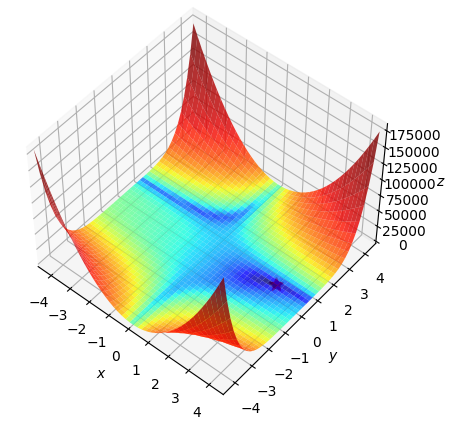

In [5]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [6]:
f(*minima_)

array([0.])

In [7]:
minima

array([3. , 0.5])

In [8]:
fig = go.Figure(data=[go.Surface(contours = {
        "z": {"show": True, "color":"white", "start": 0.001, "end": 100.001, "size": 5.0},
    },x=x, y=y, z=z)])


fig.add_scatter3d(
   x = minima_[0], y = minima_[1], z = f(*minima_),mode = 'markers', marker = dict(
      size = 4,
      color = 1, # set color to an array/list of desired values
      colorscale = 'Viridis',
      symbol="circle"
      )
   )

fig.update_layout(title='Objective function', autosize=False,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_scenes(xaxis_title_text='x',  
                  yaxis_title_text='y')

fig.show()

**Show the 2D level sets and their negative gradients**

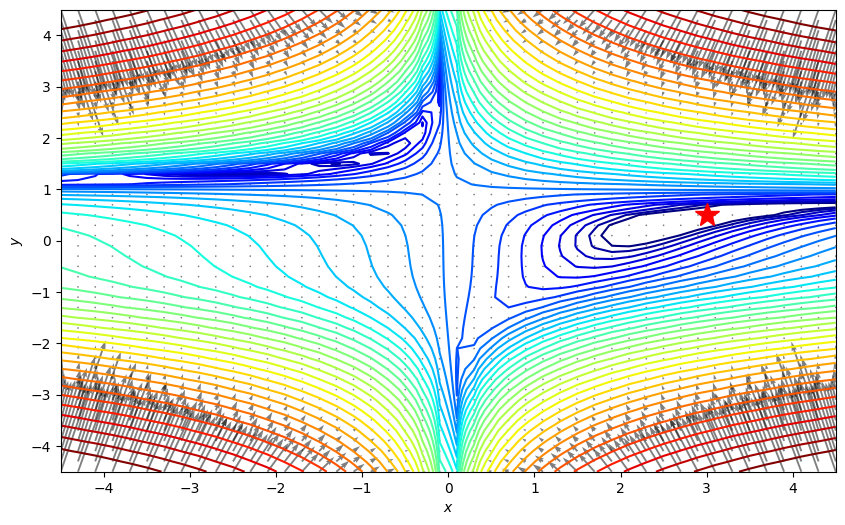

In [9]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

**Optimize the function**

In [10]:
#f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [11]:
params = torch.tensor([[0.1], [0.9]], requires_grad = True)
X=params[0]
Y=params[1]
path_list=[]  
path_list.append(params.detach().numpy().copy())

optimizer = torch.optim.Adam([params], lr=0.01)
steps = 2000
for i in range(steps):
  optimizer.zero_grad()
  #my_f = (1.5-X+X*Y)**2+(2.25-X+X*Y**2)**2+(2.625-X+X*Y**3)**2  
  my_f=f(X,Y)
  my_f.backward()
  optimizer.step()
  path_list.append(params.detach().numpy().copy())
  if i%100 == 0:
    print(f'At step {i+1 :4} x={str([round(params[i].item(), 3) for i in range(params.numel())]) :16}'\
          f' and the function value is {my_f.item(): 0.4f}.' )

At step    1 x=[0.11, 0.89]     and the function value is  13.9465.
At step  101 x=[1.202, 0.006]   and the function value is  3.2671.
At step  201 x=[1.818, 0.065]   and the function value is  0.8956.
At step  301 x=[2.151, 0.212]   and the function value is  0.3241.
At step  401 x=[2.357, 0.294]   and the function value is  0.1450.
At step  501 x=[2.496, 0.346]   and the function value is  0.0746.
At step  601 x=[2.598, 0.382]   and the function value is  0.0418.
At step  701 x=[2.676, 0.408]   and the function value is  0.0246.
At step  801 x=[2.738, 0.427]   and the function value is  0.0150.
At step  901 x=[2.787, 0.442]   and the function value is  0.0093.
At step 1001 x=[2.828, 0.454]   and the function value is  0.0058.
At step 1101 x=[2.861, 0.463]   and the function value is  0.0036.
At step 1201 x=[2.889, 0.471]   and the function value is  0.0023.
At step 1301 x=[2.911, 0.477]   and the function value is  0.0014.
At step 1401 x=[2.93, 0.482]    and the function value is  0.

In [12]:
#The path during the optimization

skip=50
path_ = np.squeeze(np.array(path_list).T)
path = path_[:,::skip]
print(path.shape)


(2, 41)


**Show the path**

(-4.5, 4.5)

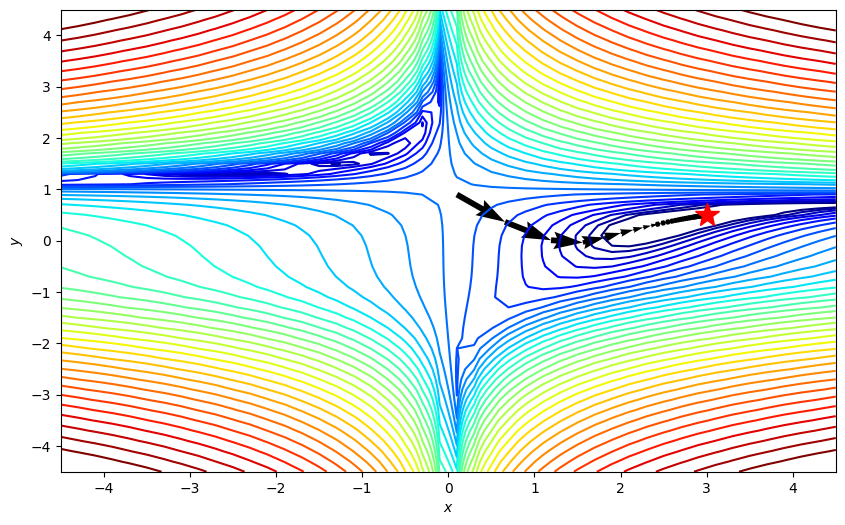

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

**2D Animation**

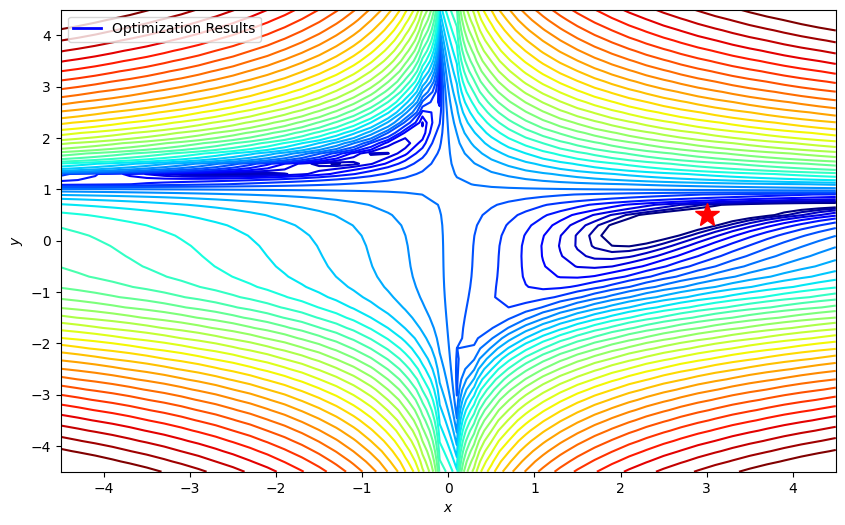

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label='Optimization Results', lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [15]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)



In [16]:
HTML(anim.to_html5_video())

3D Animation

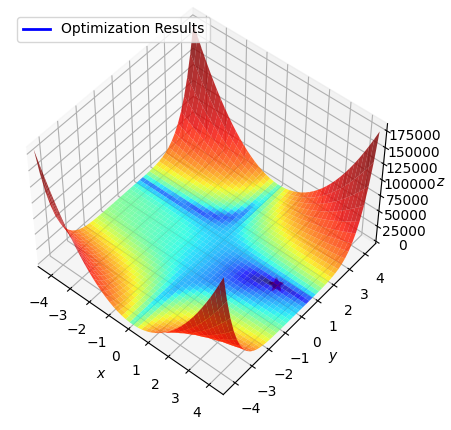

In [17]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

line, = ax.plot([], [], [], 'b', label='Optimization Results', lw=2)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [18]:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(f(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(f(*path[::,i-1:i]))
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [19]:
HTML(anim.to_html5_video())

### 3D Interactive Plot ### 

In [20]:
pathx = path[0,:] 
pathy = path[1,:] 
pathz = f(*path)

xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
zm = np.min(z) - 1.5
zM = np.max(z) + 1.5
N = len(pathx)

print(xm,xM)
print(ym,yM)
print(zm,zM)
print(N)

-6.0 6.000000000000007
-6.0 6.000000000000007
-1.484218750000003 181855.11328125
41


In [21]:

fig = go.Figure(data=[go.Surface(contours = {
        "z": {"show": True, "color":"white", "start": 0.001, "end": 100.001, "size": 5.0},
    },x=x, y=y, z=z),
    go.Scatter3d(
      x = pathx, y = pathy, z = pathz, mode='lines',
    line=dict(
        color='yellow',
        width=8
    ))
])

fig.add_scatter3d(
  x = minima_[0], y = minima_[1], z = f(*minima_),mode = 'markers', marker = dict(
      size = 4,
      color = "red", 
      symbol="circle"
      )
  )

fig.update_layout(title='Objective function', autosize=False,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90),
                  showlegend=False)

fig.update_scenes(xaxis_title_text='x',  
                  yaxis_title_text='y')

fig.show()

### Slider and Animation ###

In [22]:
fig = go.Figure(data=[
    go.Surface(contours = {
            "z": {"show": True, "color":"white", "start": 0.001, "end": 100.001, "size": 5.0},
        },x=x, y=y, z=z),
    go.Scatter3d(
    x = minima_[0], y = minima_[1], z = f(*minima_),mode = 'markers', marker = dict(
        size = 6,
        color = 'yellow', # set color to an array/list of desired values
        symbol="circle"
        )
    ),
    go.Scatter3d(x = pathx, y = pathy, z = pathz,
                     mode="lines",
                     line=dict(width=8, color="yellow"))
    ]
)

fig.update_layout(title='Objective function', autosize=False,
                    width=700, height=700,
                    margin=dict(l=65, r=50, b=65, t=90),
                    showlegend=False)

frames=[go.Frame(
        data=[    
            go.Surface(contours = {
              "z": {"show": True, "color":"white", "start": 0.001, "end": 100.001, "size": 5.0},
              },x=x, y=y, z=z),
            go.Scatter3d(
              x=pathx[k:k+1],
              y=pathy[k:k+1],
              z=pathz[k:k+1],
              mode="markers",
              marker=dict(color="red", size=10))
            ],
            name=f'frame{k}')
        for k in range(N)]

fig.update(frames=frames)




def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
            }


sliders = [
    {"pad": {"b": 10, "t": 60},
     "len": 0.9,
     "x": 0.1,
     "y": 0,
     
     "steps": [
                 {"args": [[f.name], frame_args(0)],
                  "label": str(k),
                  "method": "animate",
                  } for k, f in enumerate(fig.frames)
              ]
     }
        ]

fig.update_layout(

    updatemenus = [{"buttons":[
                    {
                        "args": [None, frame_args(N)],
                        "label": "Play", 
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "Pause", 
                        "method": "animate",
                  }],
                    
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders
    )

fig.update_layout(scene = dict(xaxis=dict(range=[xm, xM], autorange=False),
                               yaxis=dict(range=[ym, yM], autorange=False),
                               zaxis=dict(range=[zm, zM], autorange=False)
                               )
                  )

fig.update_layout(sliders=sliders)

fig.show()